<a href="https://colab.research.google.com/github/BurgundyIsAPublicEnemy/ORLIAn-source/blob/main/ORLIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
IMAGEFILES = '/content/drive/MyDrive/ORLIAn /image_data'
TABULARTRAINING = '/content/drive/MyDrive/ORLIAn /KORL_avatar_train.csv'

In [137]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing

count = 0
import os
for dirname, _, filenames in os.walk(IMAGEFILES):
    for filename in filenames:
        count = count + 1
print(count , " files detected")

1421  files detected


In [138]:
train_df = pd.read_csv(TABULARTRAINING)

In [139]:
train_df.head()

,Patient_ID,OMS,Sexe,Age,Date_biopsie,Age_diag,Date_derniere_nouvelles,Deces,Recidive,localisation,RNA_scope,T,N,M,Tabac,Alcool,OS
0,824635,0,1,1965-05-11,2014-03-28,48,2019-11-06,0,0,Oropharynx,2,1,2a,0,3,1,61
1,829316,1,0,1942-12-06,2014-01-01,71,2018-01-09,1,0,Oropharynx,2,3,2b,0,0,1,56
2,82dfbb,1,1,1963-02-05,2012-03-28,48,2020-08-27,1,0,Oropharynx,1,4,2,0,0,1,101
3,832c5f,1,1,1957-11-27,2013-10-25,55,2014-10-25,1,1,Oropharynx,2,2,2b,0,2,1,12
4,837956,0,1,1959-03-15,2012-06-09,53,2021-04-06,0,0,Oropharynx,1,4,1,0,3,1,103


In [140]:
train_df.describe()

,OMS,Sexe,Age_diag,Deces,Recidive,RNA_scope,T,M,Tabac,Alcool,OS
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.00000
mean,0.893617,0.829787,61.212766,0.297872,0.212766,1.531915,3.06383,0.063830,1.638298,0.978723,47.12766
std,0.840136,0.379883,10.127312,0.462267,0.413688,0.584252,1.00875,0.247092,1.358156,0.145865,30.09739
min,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.00000
25%,0.000000,1.000000,53.500000,0.000000,0.000000,1.000000,2.00000,0.000000,0.000000,1.000000,19.00000
50%,1.000000,1.000000,58.000000,0.000000,0.000000,2.000000,3.00000,0.000000,2.000000,1.000000,56.00000
75%,1.000000,1.000000,69.000000,1.000000,0.000000,2.000000,4.00000,0.000000,3.000000,1.000000,72.00000
max,3.000000,1.000000,83.000000,1.000000,1.000000,2.000000,4.00000,1.000000,3.000000,1.000000,103.00000


### Convert times into something more workable

In [141]:
import datetime
cur = np.datetime64('today')

agedDF = pd.to_datetime(train_df['Age']).apply(lambda x : (cur - x)  )
print(agedDF)

0    20633 days
1    28825 days
2    21459 days
3    23355 days
4    22882 days
5    23839 days
6    29976 days
7    27677 days
8    20366 days
9    24609 days
10   22848 days
11   24695 days
12   31726 days
13   21127 days
14   27143 days
15   27508 days
16   32320 days
17   23208 days
18   26916 days
19   34181 days
20   23671 days
21   30285 days
22   30614 days
23   28278 days
24   20616 days
25   27625 days
26   23674 days
27   29648 days
28   24176 days
29   29327 days
30   24855 days
31   21191 days
32   21177 days
33   23189 days
34   22667 days
35   23033 days
36   27624 days
37   27786 days
38   29618 days
39   25720 days
40   24371 days
41   24450 days
42   22424 days
43   23119 days
44   26937 days
45   32853 days
46   22181 days
Name: Age, dtype: timedelta64[ns]


In [142]:
biopsieDF = pd.to_datetime(train_df['Date_biopsie']).apply(lambda x : (cur - x)  )
biopsieDF.head()

0   2780 days
1   2866 days
2   3510 days
3   2934 days
4   3437 days
Name: Date_biopsie, dtype: timedelta64[ns]

In [143]:
lastVisitDF = pd.to_datetime(train_df['Date_derniere_nouvelles']).apply(lambda x : (cur - x)  )
lastVisitDF.head()

0    731 days
1   1397 days
2    436 days
3   2569 days
4    214 days
Name: Date_derniere_nouvelles, dtype: timedelta64[ns]

In [144]:
train_df.isnull( ).sum( )

Patient_ID                 0
OMS                        0
Sexe                       0
Age                        0
Date_biopsie               0
Age_diag                   0
Date_derniere_nouvelles    0
Deces                      0
Recidive                   0
localisation               0
RNA_scope                  0
T                          0
N                          0
M                          0
Tabac                      0
Alcool                     0
OS                         0
dtype: int64

In [145]:
# Category encoding for categories
le = preprocessing.LabelEncoder()
NewNDF = le.fit_transform(train_df['N'])
print(NewNDF)

[3 4 2 4 1 5 4 2 6 0 4 5 0 6 2 1 5 6 4 0 4 6 5 5 4 5 2 4 1 2 5 4 4 4 5 4 1
 1 4 4 1 3 4 4 2 1 4]


Put it all together and drop the rows we don't need

In [146]:
train_df_mod = train_df

In [147]:
train_df_mod['biopsieDF'] = biopsieDF
train_df_mod['agedDF'] = agedDF
train_df_mod['lastVisitDF'] = lastVisitDF
train_df_mod['cat_N'] = NewNDF

train_df_mod.drop('Date_biopsie', axis=1, inplace=True)
train_df_mod.drop('Date_derniere_nouvelles', axis=1, inplace=True)
train_df_mod.drop('Age', axis=1, inplace=True)

# We can drop localisation since they're all the same
train_df_mod.drop('localisation', axis=1, inplace=True)
train_df_mod.drop('N', axis=1, inplace=True)



In [148]:
train_df_mod.head()

,Patient_ID,OMS,Sexe,Age_diag,Deces,Recidive,RNA_scope,T,M,Tabac,Alcool,OS,biopsieDF,agedDF,lastVisitDF,cat_N
0,824635,0,1,48,0,0,2,1,0,3,1,61,2780 days,20633 days,731 days,3
1,829316,1,0,71,1,0,2,3,0,0,1,56,2866 days,28825 days,1397 days,4
2,82dfbb,1,1,48,1,0,1,4,0,0,1,101,3510 days,21459 days,436 days,2
3,832c5f,1,1,55,1,1,2,2,0,2,1,12,2934 days,23355 days,2569 days,4
4,837956,0,1,53,0,0,1,4,0,3,1,103,3437 days,22882 days,214 days,1


Vik's thoughts: A lot is going on here. Why not just chuck a XGBoost or CatBoost and leave it to figure it out 

# The Image EDA


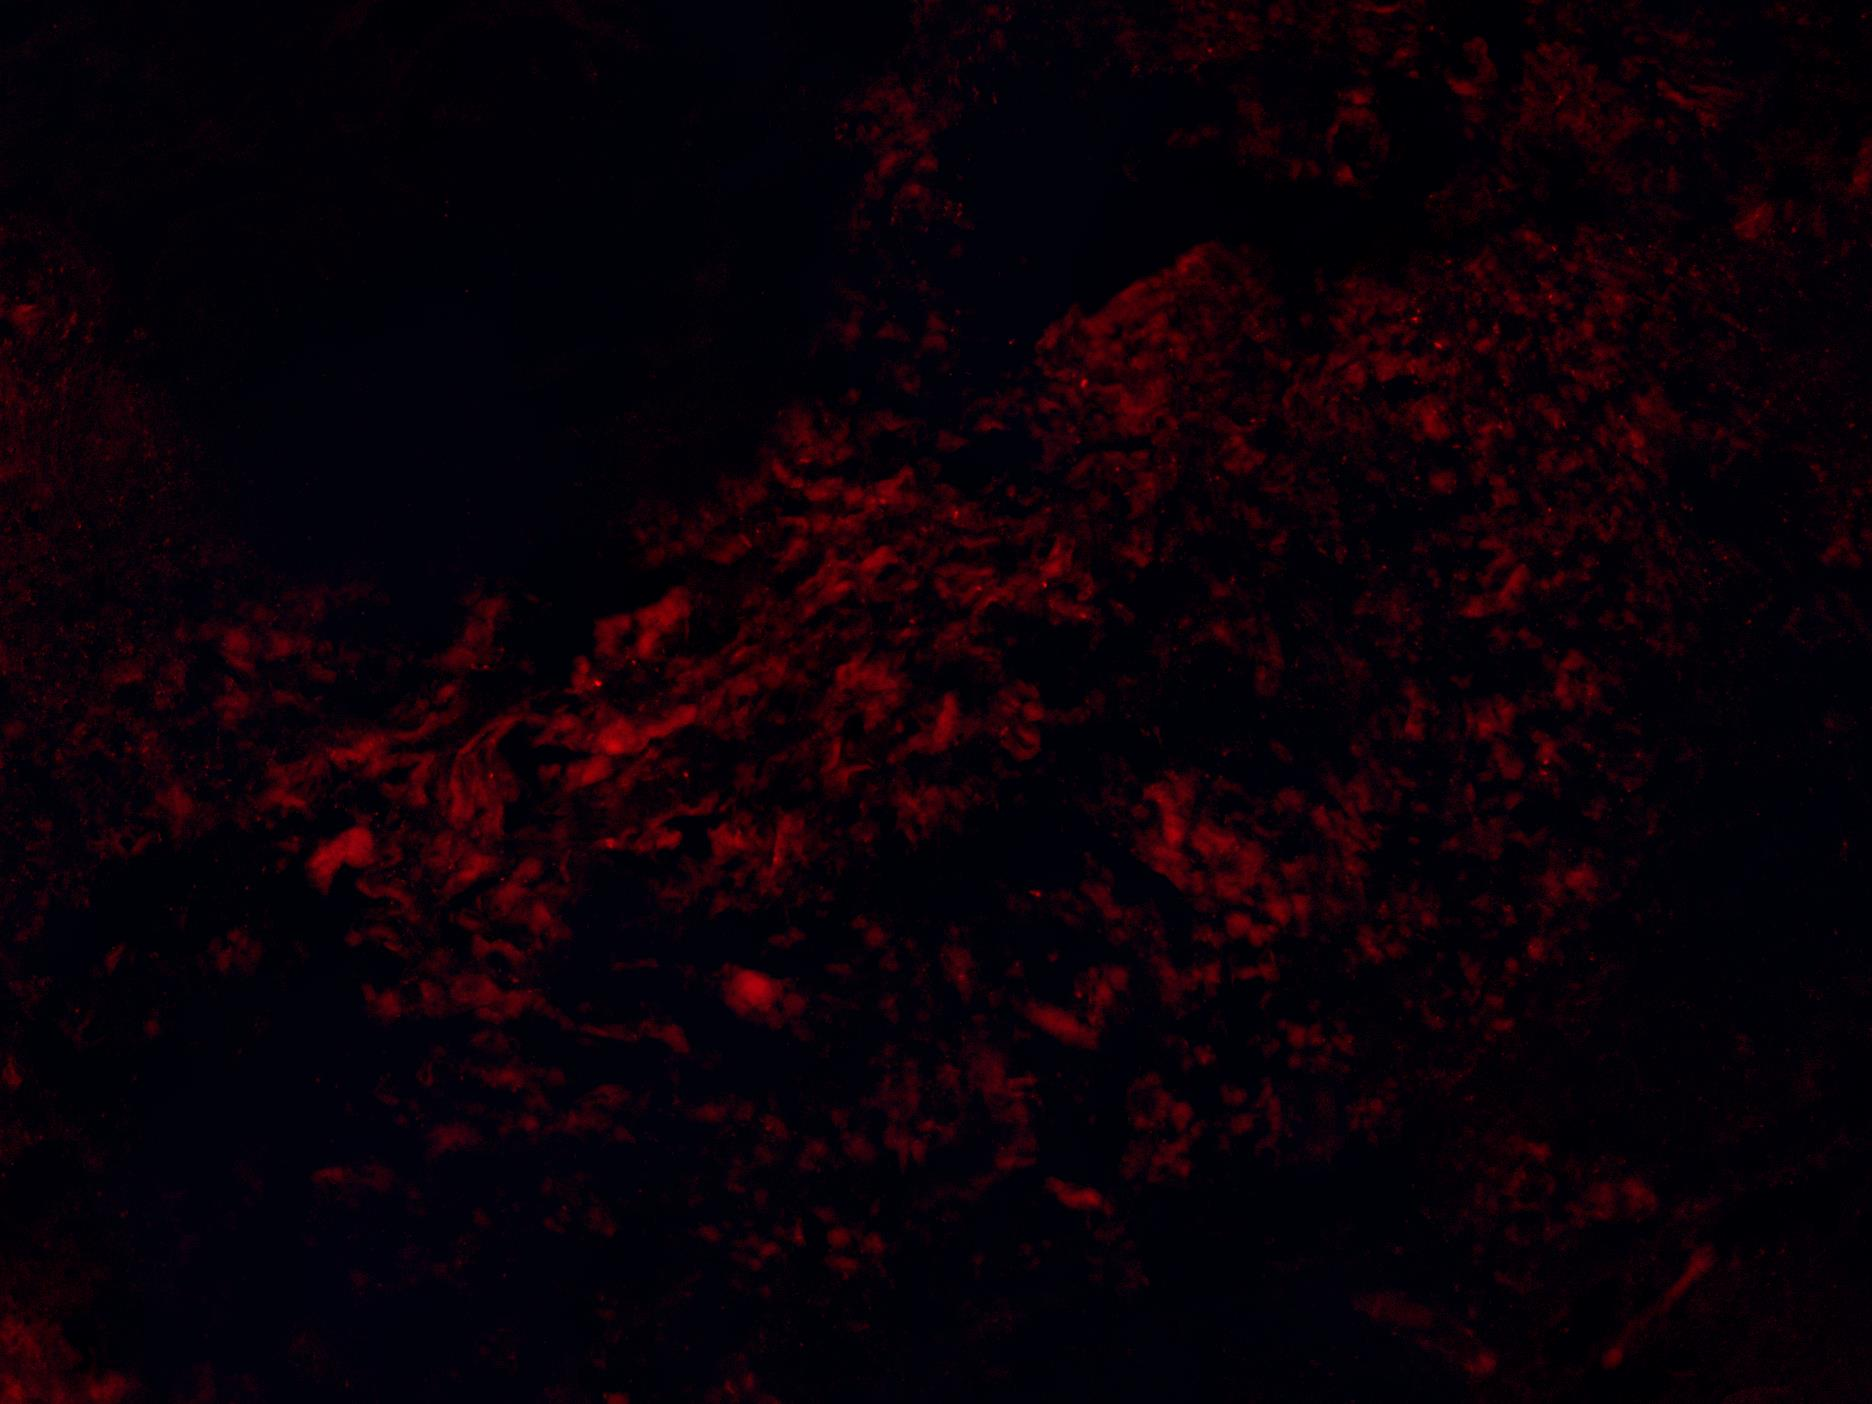

In [149]:
from google.colab.patches import cv2_imshow
import cv2

# Save image in set directory
# Read RGB image
img = cv2.imread('/content/drive/MyDrive/ORLIAn /image_data/cellule inflamatoire 1/829316_[11749,51008]_composite_image.jpg') 
  
# Output img with window name as 'image'
cv2_imshow(img) 

## Baseline model construciton

In [150]:
!pip install xgboost

In [151]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [152]:
train_df_mod.dtypes

Patient_ID              object
OMS                      int64
Sexe                     int64
Age_diag                 int64
Deces                    int64
Recidive                 int64
RNA_scope                int64
T                        int64
M                        int64
Tabac                    int64
Alcool                   int64
OS                       int64
biopsieDF      timedelta64[ns]
agedDF         timedelta64[ns]
lastVisitDF    timedelta64[ns]
cat_N                    int64
dtype: object

In [153]:
X = train_df_mod[train_df_mod.columns.drop('Deces', 'Recidive')]
y = train_df_mod['Deces']

# Prepping
X = X[X.columns.drop('Patient_ID')]
X['biopsieDF'] = X['biopsieDF'].astype(int)  
X['agedDF'] = X['agedDF'].astype(int)  
X['lastVisitDF'] = X['lastVisitDF'].astype(int)  


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

In [155]:
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [156]:
y_pred = model.predict(X_test)
print(y_pred)

print(r2_score(y_test,y_pred))

[0 0 1 0 0 0 0 0 0 0 0 0]
0.11111111111111116
